This note book includes exploritary data analysis of the training data and the Unseen storm.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from PIL import Image
import os
import json
import pandas as pd
import imageio

/home/iyc23/miniconda3/envs/group/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Below, is the code that preproceessing the data  fromt the file into a tensor

In [ ]:
class StormImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Initialize the dataset with the base directory of the images and JSON files.
        Args:
            root_dir (string): Directory with all the images and JSON files.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        # Assuming the naming convention is consistent, we only need to list one type of file
        # Here we list the image files to determine the dataset size
        self.files = [file for file in sorted(os.listdir(root_dir)) if file.endswith('.jpg')]

    def __len__(self):
        return len(self.files)
    def __getitem__(self, idx):
        # File stem is used to associate images with their feature and label JSON files
        file_stem = self.files[idx].split('.')[0]
        
        # Load image
        img_name = os.path.join(self.root_dir, file_stem + '.jpg')
        image = Image.open(img_name).convert('RGB')

        # Load features
        features_name = os.path.join(self.root_dir, file_stem + '_features.json')
        with open(features_name, 'r') as f:
            features = json.load(f)
        
        # Load label
        label_name = os.path.join(self.root_dir, file_stem + '_label.json')
        with open(label_name, 'r') as f:
            label = json.load(f)
        
        # If transforms are provided, apply them to the image
        if self.transform:
            image = self.transform(image)
        
        # Return a tuple of the image tensor, features, and label
        return image, features, label

# Transformations can be added here
transformations = ToTensor()

# Instantiate the dataset
root_dir = '/home/iyc23/group-poj2/tst-20240201T133502Z-001/tst'
dataset = StormImageDataset(root_dir=root_dir, transform=transformations)



I converted the feature data and the windspead data into set of CSV files using the code below, these csv files is what I used to plot the data.

In [26]:
images =[]
ocean=[]
wind =[]
time= []
for i in range(242):
    image, feature, label =dataset[i]
    images.append(image)
    ocean.append(feature['ocean'])
    time.append(int(feature['relative_time']))
    wind.append(label['wind_speed'])
diff =[]
j=0
for i in time:
    diff.append(i-j)
    j=i
diff =pd.DataFrame(diff)
#diff['timediff_ing']=timedif
diff[f'WindSpeed']=wind
diff[f'timediff']=diff[0]
diff[f'time']=time
diff[f'ocean']=ocean
diff =diff.drop(columns=0)
diff.to_csv('suprisestorm.csv', index=False)

Below, is the modelling of the windspeed over time

Text(0.5, 1.0, 'Wind Speed Over Time for Unseen Storm')

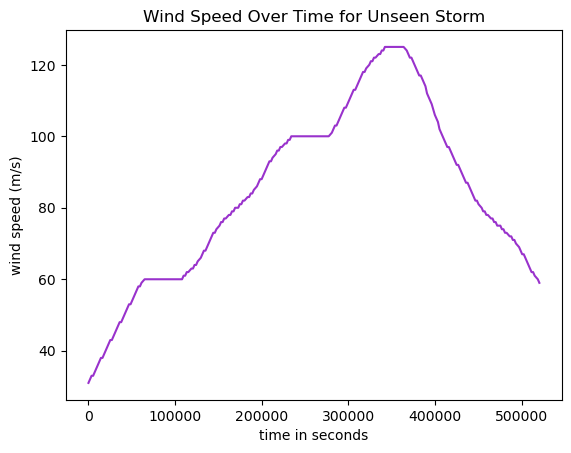

In [34]:
surprise =pd.read_csv('suprisestorm.csv')
plt.plot(surprise['time'],surprise['WindSpeed'], 'darkorchid')
plt.xlabel('time in seconds')
plt.ylabel('wind speed (m/s)')
plt.title('Wind Speed Over Time for Unseen Storm')

The code below is taking the CSV files from my directory to plot the graphs below

In [25]:
folder_path = '/home/iyc23/group-poj2/storm_csv'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = {}
for file in csv_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    dfs[file] = df

Below is the plot of a sample of storms what occured in ocean 1, windpseed over time. this was used to see if there are any characteristic differences between the storms in ocean 1 and 2.

([<matplotlib.axis.XTick at 0x7f52132c59d0>,
 [Text(0, 0, '0'),
  Text(100000, 0, '1'),
  Text(200000, 0, '2'),
  Text(300000, 0, '3'),
  Text(400000, 0, '4'),
  Text(500000, 0, '5'),
  Text(600000, 0, '6'),
  Text(700000, 0, '7'),
  Text(800000, 0, '8'),
  Text(900000, 0, '9'),
  Text(1000000, 0, '10')])

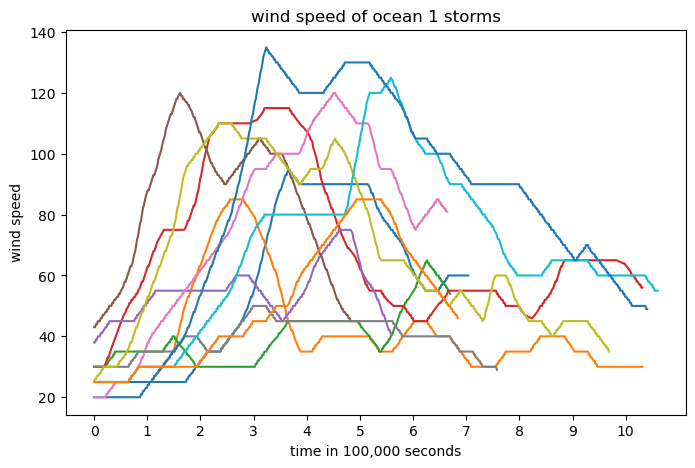

In [76]:
plt.figure(figsize=(8, 5)) 
df1 =dfs['fna.csv']
df2 =dfs['bkh.csv']
plt.plot(df1['time_fna'], df1['WindSpeed_fna'], label='fna')
plt.plot(df2['time_bkh'], df2['WindSpeed_bkh'], label='bkh')
df3 =dfs['blq.csv']
df4 =dfs['dzw.csv']
plt.plot(df3['time_blq'], df3['WindSpeed_blq'], label='blq')
plt.plot(df4['time_dzw'], df4['WindSpeed_dzw'], label='dzw')
df5 =dfs['ztb.csv']
df6 =dfs['pvj.csv']
plt.plot(df5['time_ztb'], df5['WindSpeed_ztb'], label='ztb')
plt.plot(df6['time_pvj'], df6['WindSpeed_pvj'], label='pvj')
df7 =dfs['kqu.csv']
df8 =dfs['mtw.csv']
plt.plot(df7['time_kqu'], df7['WindSpeed_kqu'], label='kqu')
plt.plot(df8['time_mtw'], df8['WindSpeed_mtw'], label='mtw')
df9 =dfs['ipa.csv']
df10 =dfs['eoi.csv']
plt.plot(df9['time_ipa'], df9['WindSpeed_ipa'], label='ipa')
plt.plot(df10['time_eoi'], df10['WindSpeed_eoi'], label='eoi')
df11 =dfs['wsy.csv']
df12 =dfs['xjo.csv']
plt.plot(df11['time_wsy'], df11['WindSpeed_wsy'], label='wsy')
plt.plot(df12['time_xjo'], df12['WindSpeed_xjo'], label='xjo')
#plt.legend()
plt.xlabel('time in 100,000 seconds')
plt.ylabel('wind speed')
plt.title('wind speed of ocean 1 storms')
plt.xticks([0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000], ['0', '1', '2', '3', '4','5','6','7','8','9','10'])

Below is the plot for the storms occuring in ocean 2, there does not seem to be much difference between the storm in the different oceans

Text(0.5, 1.0, 'wind speed of ocean 2 storms')

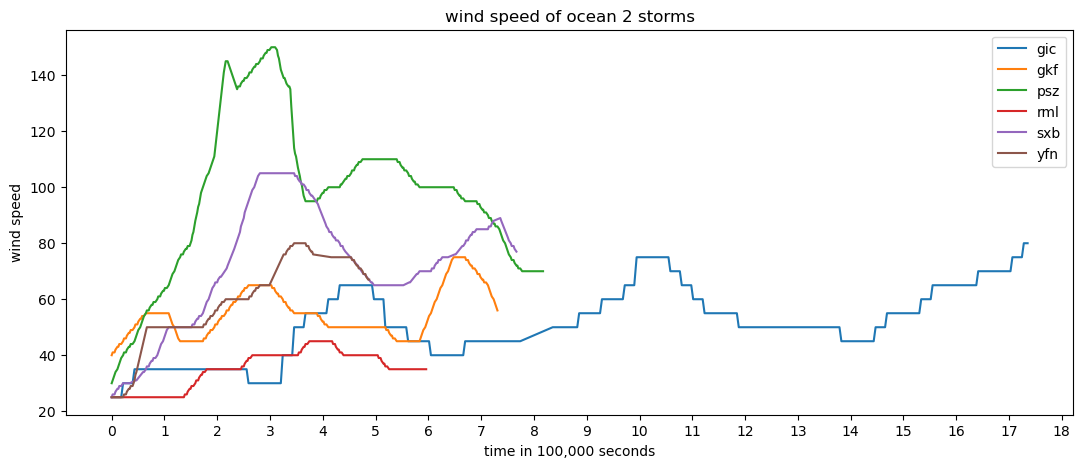

In [74]:
plt.figure(figsize=(13, 5)) 
df1 =dfs['gic.csv']
df2 =dfs['gkf.csv']
plt.plot(df1['time_gic'], df1['WindSpeed_gic'], label='gic')
plt.plot(df2['time_gkf'], df2['WindSpeed_gkf'], label='gkf')
df3 =dfs['psz.csv']
df4 =dfs['rml.csv']
plt.plot(df3['time_psz'], df3['WindSpeed_psz'], label='psz')
plt.plot(df4['time_rml'], df4['WindSpeed_rml'], label='rml')
df5 =dfs['sxb.csv']
df6 =dfs['yfn.csv']
plt.plot(df5['time_sxb'], df5['WindSpeed_sxb'], label='sxb')
plt.plot(df6['time_yfn'], df6['WindSpeed_yfn'], label='yfn')
plt.xticks([0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000], ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])
plt.legend()
plt.xlabel('time in 100,000 seconds')
plt.ylabel('wind speed')
plt.title('wind speed of ocean 2 storms')

Here we are looking at the time steps between each image, most times steps are 1800 seconds, however there are some jumps where the dfference is a lot greater.

Text(0.5, 1.0, 'storm "xjo" time differences in the images (ocean 1)')

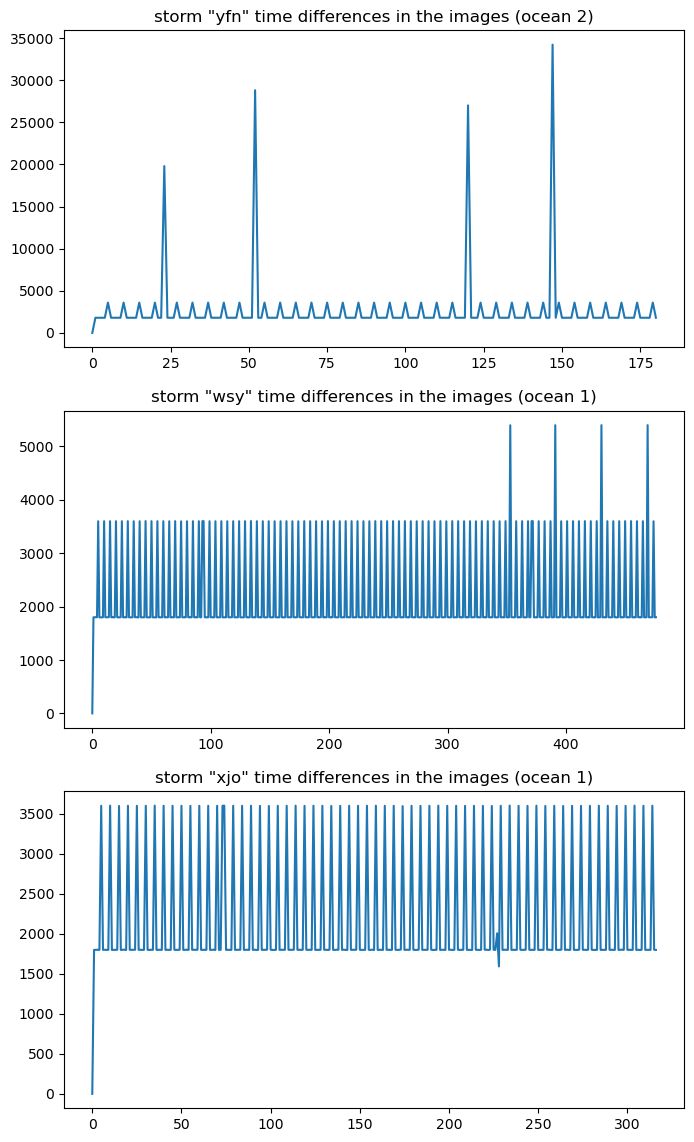

In [92]:
df6 =dfs['yfn.csv']
fig, axs = plt.subplots(3,figsize=(8,14))
axs[0].plot(df6['timediff_yfn'])
axs[0].set_title('storm "yfn" time differences in the images (ocean 2)')
df11 =dfs['wsy.csv']
df12 =dfs['xjo.csv']
axs[1].plot(df11['timediff_wsy'])
axs[1].set_title('storm "wsy" time differences in the images (ocean 1)')
axs[2].plot(df12['timediff_xjo'])
axs[2].set_title('storm "xjo" time differences in the images (ocean 1)')

In [112]:
df9.mean()

WindSpeed_ipa        68.630290
timediff_ipa       2156.792873
time_ipa         484917.089087
ocean_ipa             1.000000
dtype: float64

Below, there is a plot of the average wind speed and the average time step of all the storms, this is to check that there is no structural difference of the data from ocean 1 and ocean 2.

In [113]:
ave_wind =[]

for file in csv_files:
    df =dfs[file]
    mn =df.mean().values
    ave_wind.append((mn[0],mn[3]))

In [137]:
windDF =pd.DataFrame(ave_wind, columns=['wind','ocean'])
ocean1 =windDF.loc[windDF['ocean'].isin([1.0])]
ocean2 =windDF.loc[windDF['ocean'].isin([2.0])]

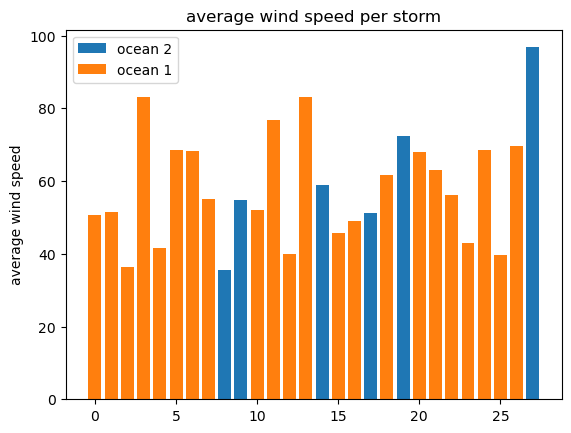

In [144]:
plt.bar(ocean2.index,ocean2['wind'],label='ocean 2')
plt.bar(ocean1.index,ocean1['wind'],label='ocean 1')
plt.title('average wind speed per storm')
plt.ylabel('average wind speed')
plt.legend()

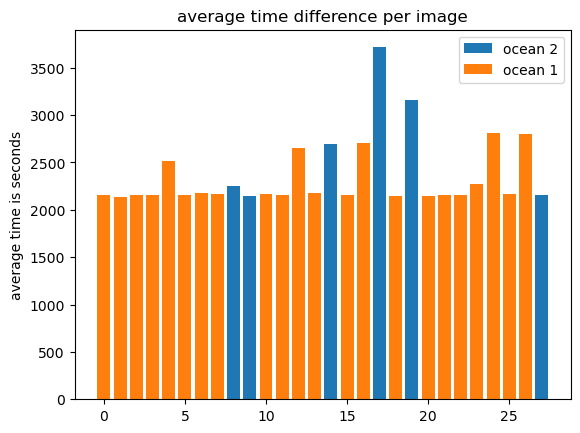

In [146]:
ave_tdiff =[]
for file in csv_files:
    df =dfs[file]
    mn =df.mean().values
    ave_tdiff.append((mn[1],mn[3]))
windDF =pd.DataFrame(ave_tdiff, columns=['tdiff','ocean'])
ocean1 =windDF.loc[windDF['ocean'].isin([1.0])]
ocean2 =windDF.loc[windDF['ocean'].isin([2.0])]
plt.bar(ocean2.index,ocean2['tdiff'],label='ocean 2')
plt.bar(ocean1.index,ocean1['tdiff'],label='ocean 1')
plt.title('average time difference per image')
plt.ylabel('average time is seconds')
plt.legend()

The code below is used to convert the images into a gif to help visualise the storm 

In [ ]:
def create_gif(folder_path, gif_path):
    files = [file for file in sorted(os.listdir(folder_path)) if file.endswith('.jpg')]
    files.sort()
    images = []
    for file_name in files:
        image_path = os.path.join(folder_path, file_name)
        img = Image.open(image_path)
        images.append(img)
    imageio.mimsave(gif_path, images, duration=0.5)